<a href="https://colab.research.google.com/github/IlyaZutler/Dimonds/blob/main/DS_Dimond_D_T_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.tree import export_graphviz
import graphviz
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
sns.pairplot(df, hue="species")

In [3]:
df_diamonds = sns.load_dataset('diamonds')
df_diamonds_orig = df_diamonds.copy()
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
color_reting = pd.DataFrame({'color':['D','E','F','G','H','I','J'], 'color_rating' :[1,2,3,4,5,6,7]} )
color_reting

,color,color_rating
0,D,1
1,E,2
2,F,3
3,G,4
4,H,5
5,I,6
6,J,7


In [5]:
cut_reting = pd.DataFrame({'cut':['Ideal','Premium','Very Good','Good','Fair'], 'cut_rating' :[1,2,3,4,5]} )
cut_reting

,cut,cut_rating
0,Ideal,1
1,Premium,2
2,Very Good,3
3,Good,4
4,Fair,5


In [6]:
clarity_reting = pd.DataFrame({'clarity':['IF','VVS1','VVS2', 'VS1','VS2','SI1','SI2','I1' ], 'clarity_rating' :[1, 2, 2.5, 3, 4, 5, 6, 7]} )
clarity_reting

,clarity,clarity_rating
0,IF,1.0
1,VVS1,2.0
2,VVS2,2.5
3,VS1,3.0
4,VS2,4.0
5,SI1,5.0
6,SI2,6.0
7,I1,7.0


In [7]:
df_diamonds_orig = df_diamonds_orig.merge(color_reting, how='left', on='color')
df_diamonds_orig = df_diamonds_orig.merge(cut_reting, how='left', on='cut')
df_diamonds_orig = df_diamonds_orig.merge(clarity_reting, how='left', on='clarity')
df_diamonds_orig.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,color_rating,cut_rating,clarity_rating
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,6.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,2,5.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,4,3.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,6,2,4.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,7,4,6.0


In [24]:
df_diamonds_orig = df_diamonds_orig[(df_diamonds_orig['y'] < df_diamonds_orig['y'].mean()+4*df_diamonds_orig['y'].std()) & (df_diamonds_orig['y'] >0)]
df_diamonds_orig = df_diamonds_orig[(df_diamonds_orig['x'] < df_diamonds_orig['x'].mean()+4*df_diamonds_orig['x'].std()) & (df_diamonds_orig['x'] >0)]
df_diamonds_orig = df_diamonds_orig[(df_diamonds_orig['z'] < df_diamonds_orig['z'].mean()+4*df_diamonds_orig['z'].std()) & (df_diamonds_orig['z'] >1)]
df_diamonds_orig = df_diamonds_orig[df_diamonds_orig['table'] < 90]
df_diamonds_orig = df_diamonds_orig[df_diamonds_orig['depth'] > 45]

In [25]:
X = df_diamonds_orig.drop(columns=['price', 'cut', 'color','clarity'])  # these are our "features" that we use to predict from
y = df_diamonds_orig['price']  # this is what we want to learn to predict

In [26]:
X.describe()

,carat,depth,table,x,y,z,color_rating,cut_rating,clarity_rating
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000
mean,0.797390,61.750348,57.456339,5.731195,5.733029,3.539126,3.593816,2.095420,4.096199
std,0.472787,1.425307,2.228087,1.118772,1.110674,0.691121,1.701193,1.116175,1.403553
min,0.200000,50.800000,43.000000,3.730000,3.680000,1.070000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,2.000000,1.000000,3.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,4.000000,2.000000,4.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5.000000,3.000000,5.000000
max,4.010000,79.000000,79.000000,10.140000,10.100000,6.310000,7.000000,5.000000,7.000000


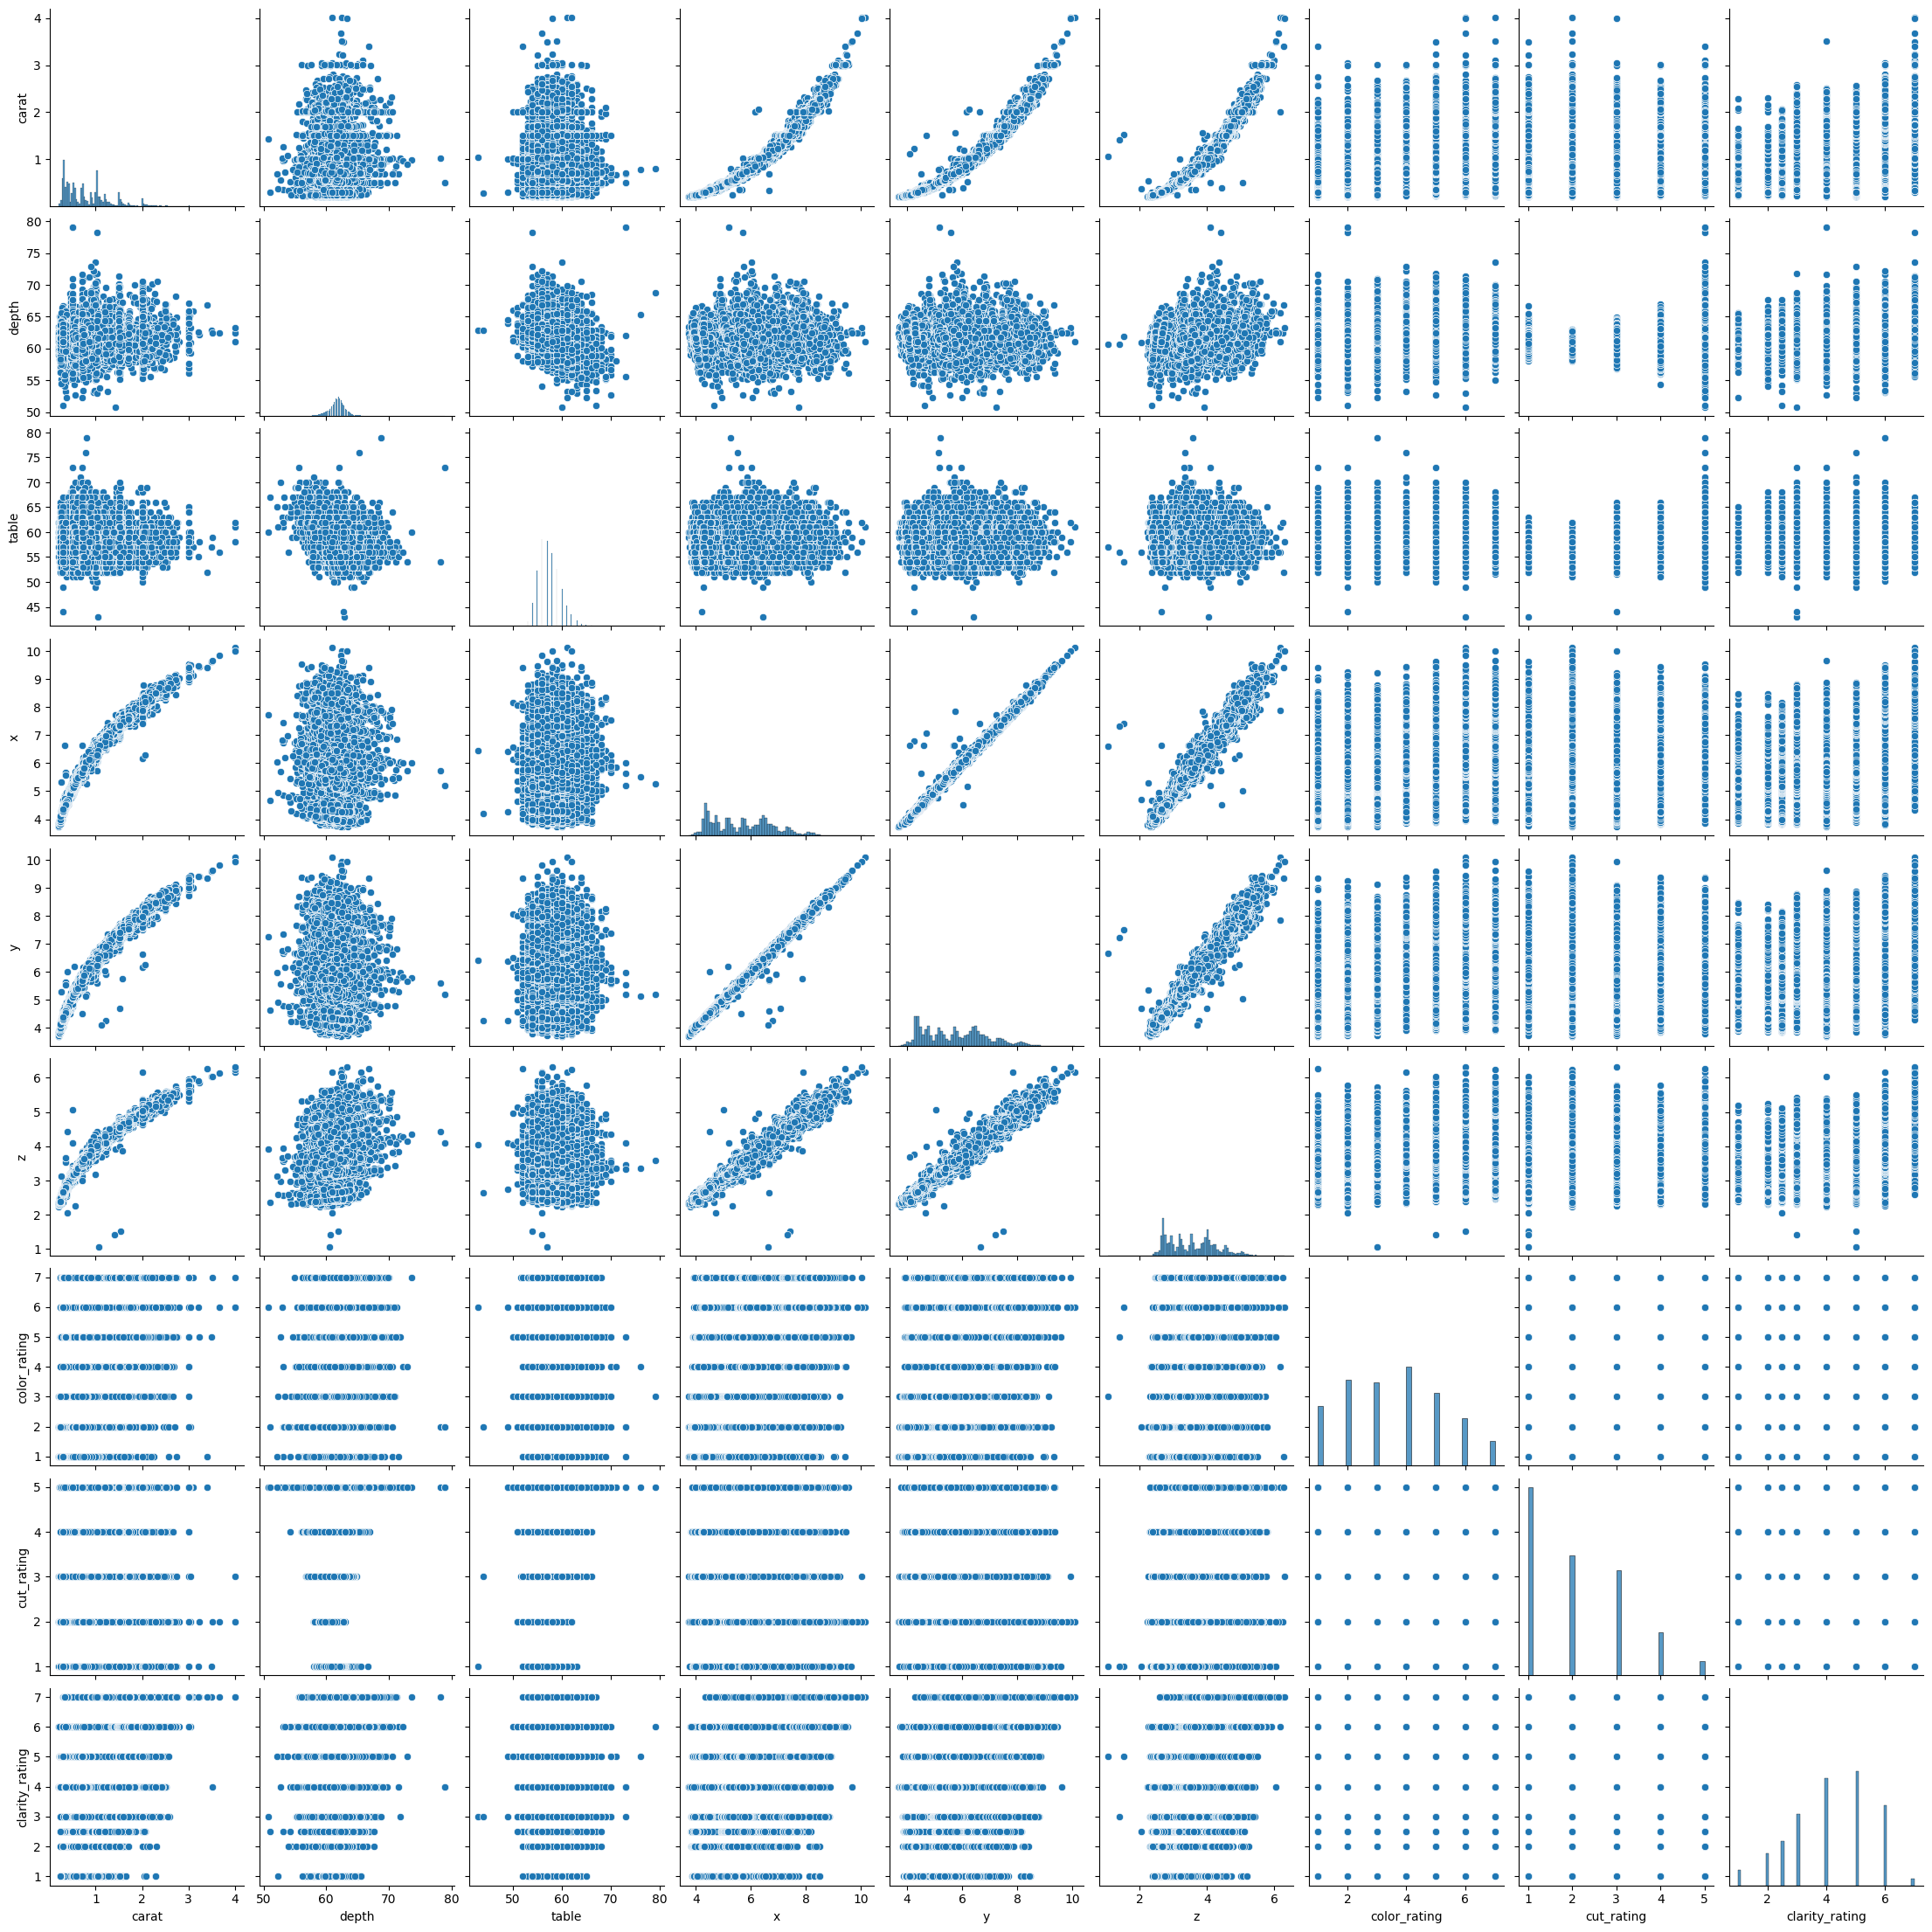

In [27]:
sns.pairplot(X)

In [31]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Create and train the model
model = RandomForestRegressor(n_estimators=200, max_depth=12)
model.fit(X_train, y_train)

# Prediction
y_test_pred = model.predict(X_test)

# Evaluate the model
print(f'Model R^2 score: {model.score(X_test, y_test)}')

def RMSE(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean() ** 0.5

def summary(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("Train RMSE:", round(RMSE(y_train_pred, y_train),3))
    print("Test RMSE:", round(RMSE(y_test_pred, y_test),3))
    print("Train STD", round(y_train.std(),3))
    print("Test STD", round(y_test.std(), 3))
    return y_train_pred, y_test_pred


y_train_pred, y_test_pred = summary(model)

Model R^2 score: 0.9812146016788915
Train RMSE: 383.604
Test RMSE: 541.924
Train STD 3999.197
Test STD 3954.042


In [32]:
# важность признаков модели в порядке убывания важности
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

carat             0.510416
y                 0.383239
clarity_rating    0.064622
color_rating      0.030661
z                 0.003816
x                 0.003171
depth             0.001674
cut_rating        0.001237
table             0.001164
dtype: float64
